In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('heart.csv')
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Problem Statement
- In this dataset our goal is to learn about `acccuracy` and `Cofussion Matrix`.

## Saperate feature and label

In [4]:
feature=df.drop(columns=['HeartDisease'])
lable=df['HeartDisease']

In [5]:
feature.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up


In [6]:
lable

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

# Saperate Numerical and categorical col

In [7]:
num_col=feature.select_dtypes('number').columns
num_col

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

In [8]:
cat_col=feature.select_dtypes('object').columns
cat_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(feature,lable,test_size=0.2,random_state=43)

In [11]:
x_train.shape

(734, 11)

In [12]:
x_test.shape

(184, 11)

# Build pipline
- Build a Pipeline for numerical and categorical columns

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [14]:
num_pipe=Pipeline(steps=[
    ("Scale",StandardScaler())
])
num_pipe

Pipeline(steps=[('Scale', StandardScaler())])

In [15]:
cat_pipe=Pipeline(steps=[
    ("encode",OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))
])
cat_pipe

Pipeline(steps=[('encode',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse=False))])

# Build a transformer

In [16]:
from sklearn.compose import ColumnTransformer

In [17]:
process=ColumnTransformer(transformers=[
    ('num_trans',num_pipe,num_col),
    ('cat_trans',cat_pipe,cat_col),
],remainder='passthrough')
process

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_trans',
                                 Pipeline(steps=[('Scale', StandardScaler())]),
                                 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                ('cat_trans',
                                 Pipeline(steps=[('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])

# Build Final Pipeline

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression

In [19]:
logis=Pipeline(steps=[
    ("Process",process),
    ('model1',LogisticRegression()),
])
logis

Pipeline(steps=[('Process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('model1', LogisticRegression())])

In [20]:
tree=Pipeline(steps=[
    ("Process",process),
    ("model2",DecisionTreeClassifier())
])
tree

Pipeline(steps=[('Process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('model2', DecisionTreeClassifier())])

# Fit the model

In [21]:
logis.fit(x_train,y_train)

Pipeline(steps=[('Process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('model1', LogisticRegression())])

In [22]:
tree.fit(x_train,y_train)

Pipeline(steps=[('Process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('model2', DecisionTreeClassifier())])

# prediction

In [32]:
log_pre=logis.predict(x_test)
tree_pre=tree.predict(x_test)

# Check `accuracy` and `confussion matrix`

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Accuracy

In [34]:
log_accuracy=accuracy_score(y_test,log_pre)
tree_accuracy=accuracy_score(y_test,tree_pre)

In [35]:
print("Logistic Regression Accuracy:",log_accuracy)
print("Decession Tree Accuracy:",tree_accuracy)

Logistic Regression Accuracy: 0.8369565217391305
Decession Tree Accuracy: 0.7391304347826086


# Conclussion
- We see that `Logistic regression` give `83%` accuracy.
- we can also see that `Decession Tree` give `74%` accuracy.

# Problem in `Accuracy`
- `Logistic Rgression` give `83%` and its error is `17%`. but it can't tell the error type ,mean that it can't tell houw much `mistake` in `heart disease` and `non heart disease` patient.
- Similarly `Decession Tree` give `74%` and its error is `26%`. but it can't tell the error type ,mean that it can't tell houw much `mistake` in `heart disease` and `non heart disease` patient.
- Now `confussion matrix` comes in action to solve this problem.


# Logistic Regression `Confussion Matric`

[[TP] [FN]
[FP] [TN]]

In [36]:
confusion_matrix(y_test,log_pre)

array([[70, 11],
       [19, 84]], dtype=int64)

# Logistic Regression Results
- `TP`=`70` and `TN` =`84` mean that model can accuratly predict those.
- `FN`=`11` and `FP`=`19` mean that model will inaccuratly predict these values.
# Type 1 `Error`
- `FP` is a `type1 Error`.
# Types2 `Error`
- `FN` is a `types2 Error`

**Which error is most danmgerous**
- In this case `FP` is most dangerous b/c model can say person is a heart patient but they are not a `heart` patient.
- Our fouce is model can perform less error in `FP`

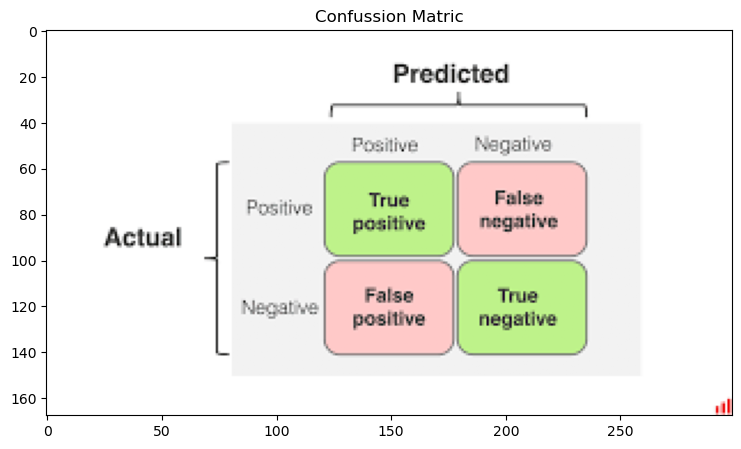

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.title("Confussion Matric")
img=plt.imread('confussion_matric.png')
plt.imshow(img)

In [37]:
confusion_matrix(y_test,tree_pre)

array([[60, 21],
       [27, 76]], dtype=int64)

# Decession Tree Results
- `TP`=`61` and `TN` =`76` mean that model can accuratly predict those.
- `FN`=`20` and `FP`=`27` mean that model will inaccuratly predict these values.
# Type 1 `Error`
- `FP` is a `type1 Error`.
# Types2 `Error`
- `FN` is a `types2 Error`

**Which error is most danmgerous**
- In this case `FP` is most dangerous b/c model can say person is a heart patient but they are not a `heart` patient.
- Our fouce is model can perform less error in `FP`

# Conclussion
- we can check the both matrix we can reach this result `Logistic Regression` is best.
- Logistic Regression is best b/c they can do less error in `FP` but `Decession Tree` can do large error in `FP`
- so we can say that `Decession tree Type error > Logistic Regression Regression Type1 error` 

# precession
- **Type 1 Error is precession**

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [38]:
log_prec=precision_score(y_test,log_pre)
tree_prec=precision_score(y_test,tree_pre)

In [40]:
print('Logistic Regression Precession: ',log_prec)
print('Tree precression: ',tree_prec)

Logistic Regression Precession:  0.8842105263157894
Tree precression:  0.7835051546391752


# Recall
- **Type2 Error is recall**

In [42]:
log_rec=recall_score(y_test,log_pre)
tree_rec=recall_score(y_test,tree_pre)

In [43]:
print('Logistic Regression Recall: ',log_prec)
print('Tree Recall: ',tree_prec)

Logistic Regression Recall:  0.8842105263157894
Tree Recall:  0.7835051546391752


# Conclussion
- We can train both model and see the accuracy, precession and recall.
- Now first we can detect which error is more dangerous.
- Then we can tell which model is best.

- **we have a dataset of heart disease patient now most dangerous is model can tell not cancer patient to cancer patientt.**
- **Now we can see `FP` is a type 1 error `it is more dangerous` now we can select `high precession` model.**
- So `Logistic Regression` is `high precession` i-e `88%` so we can select `Logistic Regression`

# F1 Score

In [50]:
from sklearn.metrics import f1_score

In [51]:
log_score=f1_score(y_test,log_pre)
tree_score=f1_score(y_test,tree_pre)

In [53]:
print("F1 Score of Logistic Regression is: ",log_score)
print("F1 Score of Decession tree is: ",tree_score)

F1 Score of Logistic Regression is:  0.8484848484848484
F1 Score of Decession tree is:  0.7600000000000001


# Note 
- Always remember `Precession` is always go to lower values.**
- Mean that it can panalize the model.